In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\Users\Sap\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load data from CSV File
df_online_shoppers_intention = pd.read_csv("online_shoppers_intention.csv")

# Display the first 5 observation
df_online_shoppers_intention.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Check for null value
null_values = df_online_shoppers_intention.isnull().sum()

# Calculate percentage of null values
total_rows = len(df_online_shoppers_intention)
null_percentage = (null_values / total_rows) * 100

# Create a DataFrame to display null values and their percentage
null_df = pd.DataFrame({'Null Values': null_values,
            'Null Percentage': null_percentage})
null_df

,Null Values,Null Percentage
Administrative,0,0.0
Administrative_Duration,0,0.0
Informational,0,0.0
Informational_Duration,0,0.0
ProductRelated,0,0.0
ProductRelated_Duration,0,0.0
BounceRates,0,0.0
ExitRates,0,0.0
PageValues,0,0.0
SpecialDay,0,0.0


In [4]:
# Summary Statistics
df_online_shoppers_intention.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [5]:
df_online_shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Encode the categorical variable
df_cat = df_online_shoppers_intention.select_dtypes(include = 'object')
df_cat.head()

,Month,VisitorType
0,Feb,Returning_Visitor
1,Feb,Returning_Visitor
2,Feb,Returning_Visitor
3,Feb,Returning_Visitor
4,Feb,Returning_Visitor


In [7]:
# Performing encoding
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat = df_cat.reset_index()

In [8]:
# Scale the Numerical data 
df_num = df_online_shoppers_intention.select_dtypes(include = 'number')

In [9]:
from sklearn.preprocessing import StandardScaler

# Initiate the StandardScaler
ss = StandardScaler()

# Transform the data
scale = ss.fit_transform(df_num)
scale

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.79029289,
        -0.89417849, -0.76262903],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849, -0.51418219],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.79029289,
         2.43708134, -0.26573535],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849,  2.21873304],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.20795193,
        -0.06136354,  1.72183936],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849, -0.51418219]])

In [10]:
df_scale = pd.DataFrame(scale, columns = df_num.columns)
df_scale = df_scale.reset_index()
df_scale

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629
1,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182
2,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735
3,3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289
4,4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,2.058618,2.121412,-0.894178,-0.762629
12326,12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,0.976499
12327,12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.961270,-0.207952,-0.894178,2.218733
12328,12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,-0.136078,-0.207952,-0.061364,1.721839


In [11]:
df_independent = pd.concat([df_scale,df_cat],axis = 1)
df_independent.head()

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,...,1,0,0,0,0,0,0,0,0,1
1,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,...,1,0,0,0,0,0,0,0,0,1
2,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,...,1,0,0,0,0,0,0,0,0,1
3,3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,...,1,0,0,0,0,0,0,0,0,1
4,4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,...,1,0,0,0,0,0,0,0,0,1


### Point the Optimal Number Of Clusters

In [12]:
model = KMeans(n_clusters = 3)
model

KMeans(n_clusters=3)

In [13]:
cluster_range = range(1,16)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(df_independent)
    labels = clusters.labels_
    centroid = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({"Num_Clusters": cluster_range,"Cluster_Errors":cluster_errors})
cluster_df.Cluster_Errors = round(cluster_df.Cluster_Errors, 6)
cluster_df

AttributeError: 'NoneType' object has no attribute 'split'

In [14]:
# Visualise the Cluster
plt.figure(figsize=(12,6))
plt.plot(cluster_df.Num_Clusters, cluster_df.Cluster_Errors, marker = 'o')
plt.show()

NameError: name 'cluster_df' is not defined

<Figure size 864x432 with 0 Axes>

In [15]:
# Create clusters based on optimal number tha we achieve from elbow diagram
# K = 3

kmeans = KMeans(n_clusters = 3, n_init = 15, random_state = 2345)
kmeans.fit(df_independent)
centroids = kmeans.cluster_centers_
centroids

array([[ 1.02680000e+04,  2.47948541e-02,  1.12114759e-02,
         7.93995267e-02,  5.08899655e-02,  2.01369644e-01,
         1.92119201e-01, -3.82391071e-02, -5.24966651e-02,
         4.19416952e-02, -3.08821366e-01,  6.03425001e-02,
         1.54929926e-02, -1.11684062e-02,  5.46001776e-02,
         1.02680000e+04,  3.96555906e-01,  2.65412692e-16,
        -1.11022302e-16,  1.31838984e-16,  7.21644966e-16,
        -1.99840144e-15,  6.03444094e-01,  1.02695630e-15,
        -3.46944695e-17,  1.94033471e-02,  8.28280378e-01],
       [ 2.04800000e+03, -1.46981110e-01, -8.68312586e-02,
        -8.72700714e-02, -5.15629239e-02, -2.06756397e-01,
        -1.66320894e-01,  7.36137861e-02,  1.11496635e-01,
        -6.55229908e-02,  2.64478692e-01, -3.75124792e-02,
        -2.58726560e-02, -3.41247741e-02, -7.62923650e-02,
         2.04800000e+03, -1.52655666e-15,  4.49109104e-02,
        -1.17961196e-16,  1.83880688e-16,  4.65462534e-01,
         4.89626556e-01,  1.80411242e-15,  1.13797860e-

In [16]:
# Create labels for the Data
centroid_df = pd.DataFrame(centroids, columns = list(df_independent))

centroid_df.index.name = 'label'
centroid_df.reset_index()

,label,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,0,10268.0,0.024795,0.011211,0.079400,0.050890,0.201370,0.192119,-0.038239,-0.052497,...,2.654127e-16,-1.110223e-16,1.318390e-16,7.216450e-16,-1.998401e-15,6.034441e-01,1.026956e-15,-3.469447e-17,1.940335e-02,0.828280
1,1,2048.0,-0.146981,-0.086831,-0.087270,-0.051563,-0.206756,-0.166321,0.073614,0.111497,...,4.491091e-02,-1.179612e-16,1.838807e-16,4.654625e-01,4.896266e-01,1.804112e-15,1.137979e-15,-2.220446e-16,-7.632783e-17,0.896510
2,2,6151.5,0.121643,0.075310,0.007343,0.000349,0.004096,-0.026932,-0.035021,-0.058481,...,2.602085e-16,1.051095e-01,7.007299e-02,6.938894e-16,3.304136e-01,1.240876e-01,1.335766e-01,1.090024e-01,1.216545e-03,0.842579


In [17]:
# Create a new dataframe only with the labels
df_labels = pd.DataFrame(kmeans.labels_,
                        columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
snail_df_labeled = df_independent.join(df_labels)
df_analysis = (snail_df_labeled.groupby(['labels'], axis = 0)).head(12330)
df_analysis

,index,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,labels
0,0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,...,0,0,0,0,0,0,0,0,1,1
1,1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,...,0,0,0,0,0,0,0,0,1,1
2,2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,...,0,0,0,0,0,0,0,0,1,1
3,3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,...,0,0,0,0,0,0,0,0,1,1
4,4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,...,0,0,0,0,0,0,0,0,1,0
12326,12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,...,0,0,0,0,1,0,0,0,1,0
12327,12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,...,0,0,0,0,1,0,0,0,1,0
12328,12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,...,0,0,0,0,1,0,0,0,1,0


In [18]:
df_analysis.labels.value_counts()

0    4120
2    4110
1    4100
Name: labels, dtype: int64

In [19]:
# Visualize the clusters
sns.pairplot(df_analysis, hue=df_analysis)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

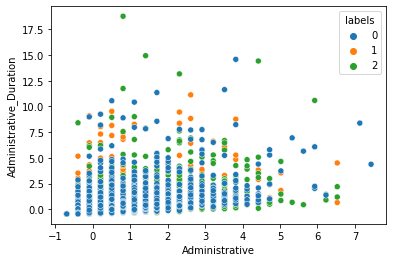

In [21]:
sns.scatterplot(x=df_analysis.Administrative, y = df_analysis.Administrative_Duration, hue=df_analysis.labels)
plt.show()